In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [15]:
def Read_inputdata(file_path):
    df = pd.read_csv(file_path) 
    print(df.head(10))
    print(df.shape)
    return df
    
data = Read_inputdata(r"E:\6th Semester\DIP\Lab\Lab 13\Lab 13\Iris.csv")
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
(150, 6)


In [ ]:
def Calculate_distance (instance1, instance2):
    dist = 0
    sl1, sw1, pl1, pw1 = instance1[0], instance1[1], instance1[2], instance1[3]
    sl2, sw2, pl2, pw2 = instance2[0], instance2[1], instance2[2], instance2[3]
    
    dist = math.sqrt(pow(sl1-sl2, 2) + pow(sw1-sw2, 2) + pow(pl1-pl2, 2) + pow(pw1-pw2, 2))
    return dist


def find_nearest_neighbours(train_set, test_inst, k):
    dist = []
    for i in range(len(train_set)):
        train_inst = train_set.iloc[i, 1:5]
        d = Calculate_distance(train_inst, test_inst)
        dist.append((train_set.iloc[i, -1], d))
        
    dist.sort(key=lambda x:x[1])       
    neighbours = []
    for i in range(k):
        neighbours.append(dist[i][0])
    return neighbours


def Get_response(nearest_neighbour_array):
    labels = nearest_neighbour_array
    #print(max(set(labels), key=labels.count))
    return max(set(labels), key=labels.count)


def Confusion_Matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}')
    plt.show()
    
    return cm, accuracy, precision

C:\Users\Choice\AppData\Local\Temp\ipykernel_17772\1368668655.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sl1, sw1, pl1, pw1 = instance1[0], instance1[1], instance1[2], instance1[3]
C:\Users\Choice\AppData\Local\Temp\ipykernel_17772\1368668655.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sl2, sw2, pl2, pw2 = instance2[0], instance2[1], instance2[2], instance2[3]
C:\Users\Choice\AppData\Local\Temp\ipykernel_17772\1368668655.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

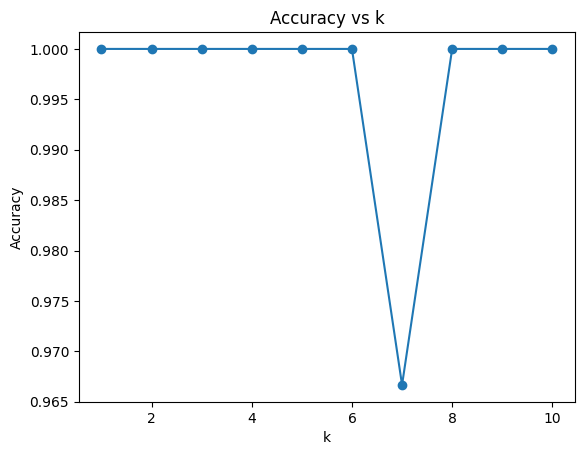

In [28]:
def Accuracy_with_k(train_set, test_set, k_values):
    accuracies = []
    for k in k_values:
        y_pred = []
        for i in range(len(test_set)):
            test_inst = test_set.iloc[i, 1:5]
            neighbours = find_nearest_neighbours(train_set, test_inst, k)
            label = Get_response(neighbours)
            y_pred.append(label)
        accuracy = accuracy_score(test_set.iloc[:, -1], y_pred)
        accuracies.append(accuracy)
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k')
    plt.show()
    
k_values = range(1, 11)
Accuracy_with_k(train_set, test_set, k_values)

C:\Users\Choice\AppData\Local\Temp\ipykernel_17772\1368668655.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sl1, sw1, pl1, pw1 = instance1[0], instance1[1], instance1[2], instance1[3]
C:\Users\Choice\AppData\Local\Temp\ipykernel_17772\1368668655.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sl2, sw2, pl2, pw2 = instance2[0], instance2[1], instance2[2], instance2[3]


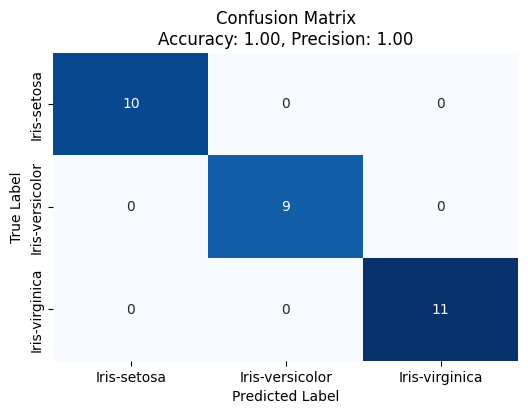

(array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 1.0,
 np.float64(1.0))

In [38]:
y_true = test_set.iloc[:, -1]
y_pred = []
for i in range(len(test_set)):
    test_inst = test_set.iloc[i, 1:5]
    neighbours = find_nearest_neighbours(train_set, test_inst, 3)
    label = Get_response(neighbours)
    y_pred.append(label)
Confusion_Matrix(y_true, y_pred)

Cross-validation scores: [0.95833333 1.         0.875      1.         0.95833333]
Mean accuracy: 0.9583333333333334


d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


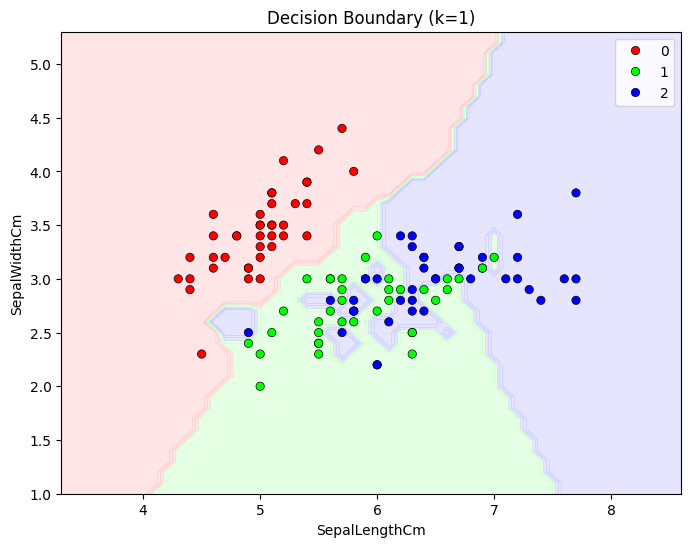

d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


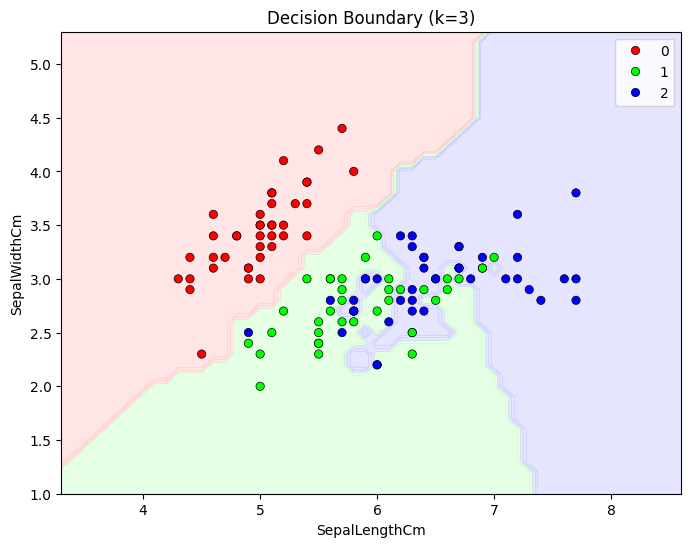

d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


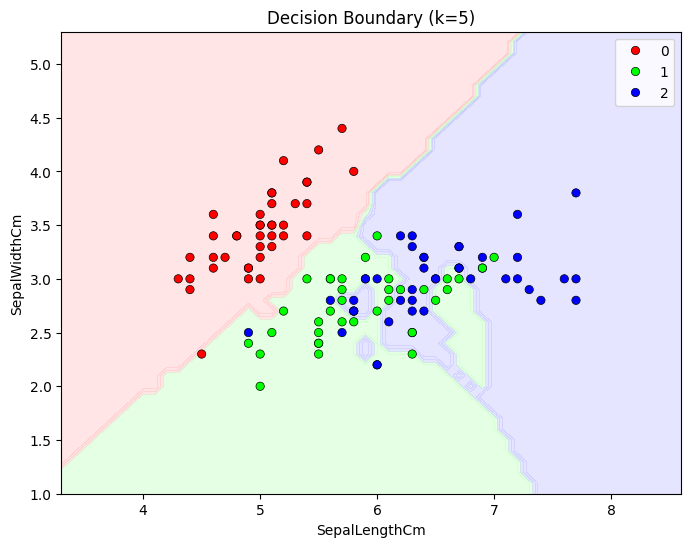

d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


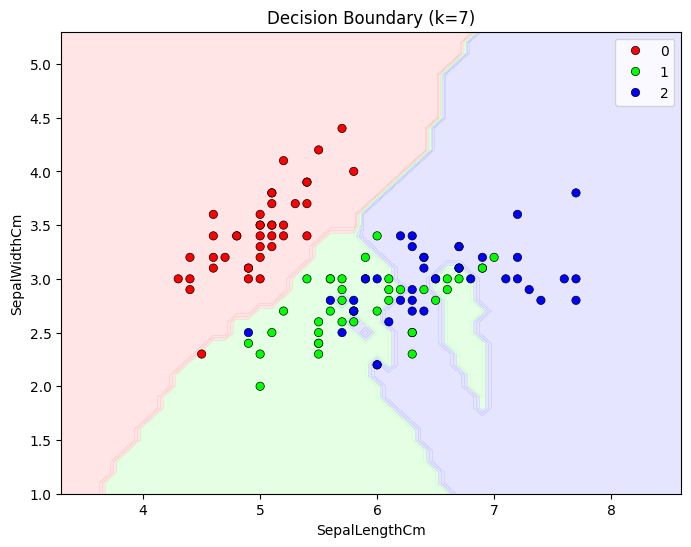

d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


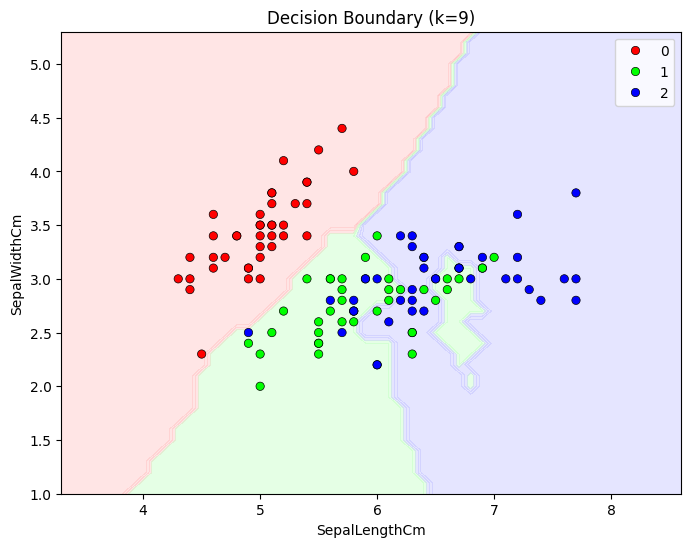

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder


knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, train_set.iloc[:, 1:5], train_set.iloc[:, -1], cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


def plot_decision_boundaries(X, y, k):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y_encoded)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y_encoded, palette=cmap_bold, edgecolor='k')
    plt.title(f"Decision Boundary (k={k})")
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

X = train_set.iloc[:, 1:3]  
y = train_set.iloc[:, -1]

for k in [1, 3, 5, 7, 9]:
    plot_decision_boundaries(X, y, k)


Confusion Matrix:
 [[50  0  0]
 [ 0 46  4]
 [ 0  7 43]]
Accuracy: 0.9267
Precision (weighted): 0.9276


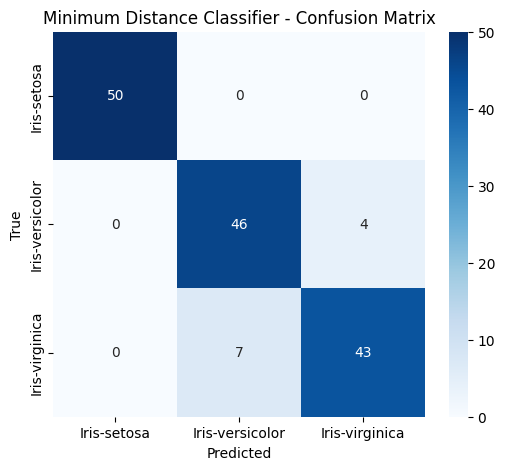

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
df = pd.read_csv(r"E:\6th Semester\DIP\Lab\Lab 13\Lab 13\Iris.csv")

# Encode species labels
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

# Separate features and labels
X = df.iloc[:, 1:5].values  # skip Id column
y = df['Species_encoded'].values
labels = le.classes_

# Calculate class means (centroids)
class_means = {}
for class_index in np.unique(y):
    class_means[class_index] = np.mean(X[y == class_index], axis=0)

# Predict using minimum distance
y_pred = []
for sample in X:
    distances = [np.linalg.norm(sample - class_means[c]) for c in class_means]
    predicted_class = np.argmin(distances)
    y_pred.append(predicted_class)
y_pred = np.array(y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')

# Print results
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Minimum Distance Classifier - Confusion Matrix')
plt.show()
